

## New York City (Citibike) dataset

For this exercise we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)

In [26]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt

### Part 1: Data pre-processing (7 pts)

Let's start by loading and pre-processing our dataset.

a) Load the `bikes` dataset into a dataframe called `bikes`. Take care of any missing values appropriately. [2pts]

In [16]:
# loading the citibike dataset
bikes = pd.read_csv('citibike.csv')

# taking care of missing values 
# finding number of missing values 
print("number of missing values: ", bikes.isnull().sum().sum()) 
# replace missing values with mean
#bikes.head(10)
#print(bikes['average_wind_speed'].isnull().sum())
bikes['average_wind_speed'] = bikes['average_wind_speed'].fillna(bikes['average_wind_speed'].mean())

bikes.head(10)


number of missing values:  3


,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,False,False
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True
5,37702,0.000000,0.0,0.0,82.04,64.04,2.68432,2013,summer,8,False,329,True,True
6,34396,0.000000,0.0,0.0,80.06,69.98,5.14495,2013,summer,8,False,329,True,True
7,28366,0.460630,0.0,0.0,80.96,69.98,4.47387,2013,summer,8,False,329,True,True
8,29017,0.051181,0.0,0.0,84.92,73.94,4.25018,2013,summer,8,False,329,True,True
9,37201,0.000000,0.0,0.0,82.94,69.98,4.92126,2013,summer,8,False,329,False,False


b) Separate your dataset into two dataframe. One dataframe should contain the data for weekends and the other one for weekdays [2pt]

In [17]:
df_weekdays = bikes[bikes['weekday'] == True]
df_weekends = bikes[bikes['weekday'] == False]
df_weekdays.head(10)

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True
5,37702,0.000000,0.0,0.0,82.04,64.04,2.68432,2013,summer,8,False,329,True,True
6,34396,0.000000,0.0,0.0,80.06,69.98,5.14495,2013,summer,8,False,329,True,True
7,28366,0.460630,0.0,0.0,80.96,69.98,4.47387,2013,summer,8,False,329,True,True
8,29017,0.051181,0.0,0.0,84.92,73.94,4.25018,2013,summer,8,False,329,True,True
11,31457,0.051181,0.0,0.0,82.04,69.98,2.01324,2013,summer,8,False,329,True,True
12,22437,0.850394,0.0,0.0,77.00,68.00,2.68432,2013,summer,8,False,329,True,True
13,38150,0.000000,0.0,0.0,73.94,60.98,6.48712,2013,summer,8,False,329,True,True


c) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain. [3pts]

<AxesSubplot: title={'center': 'trips'}, xlabel='[season]'>

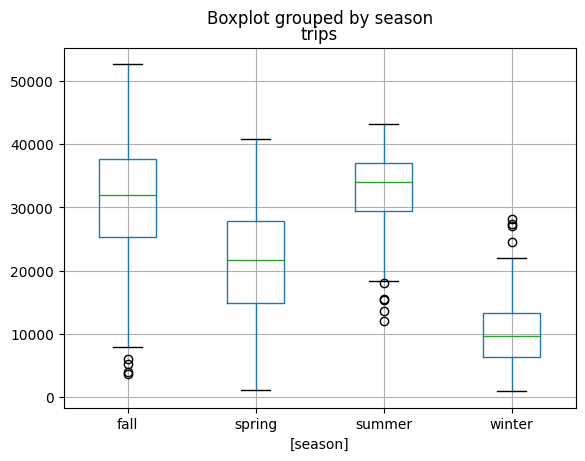

<Figure size 640x480 with 0 Axes>

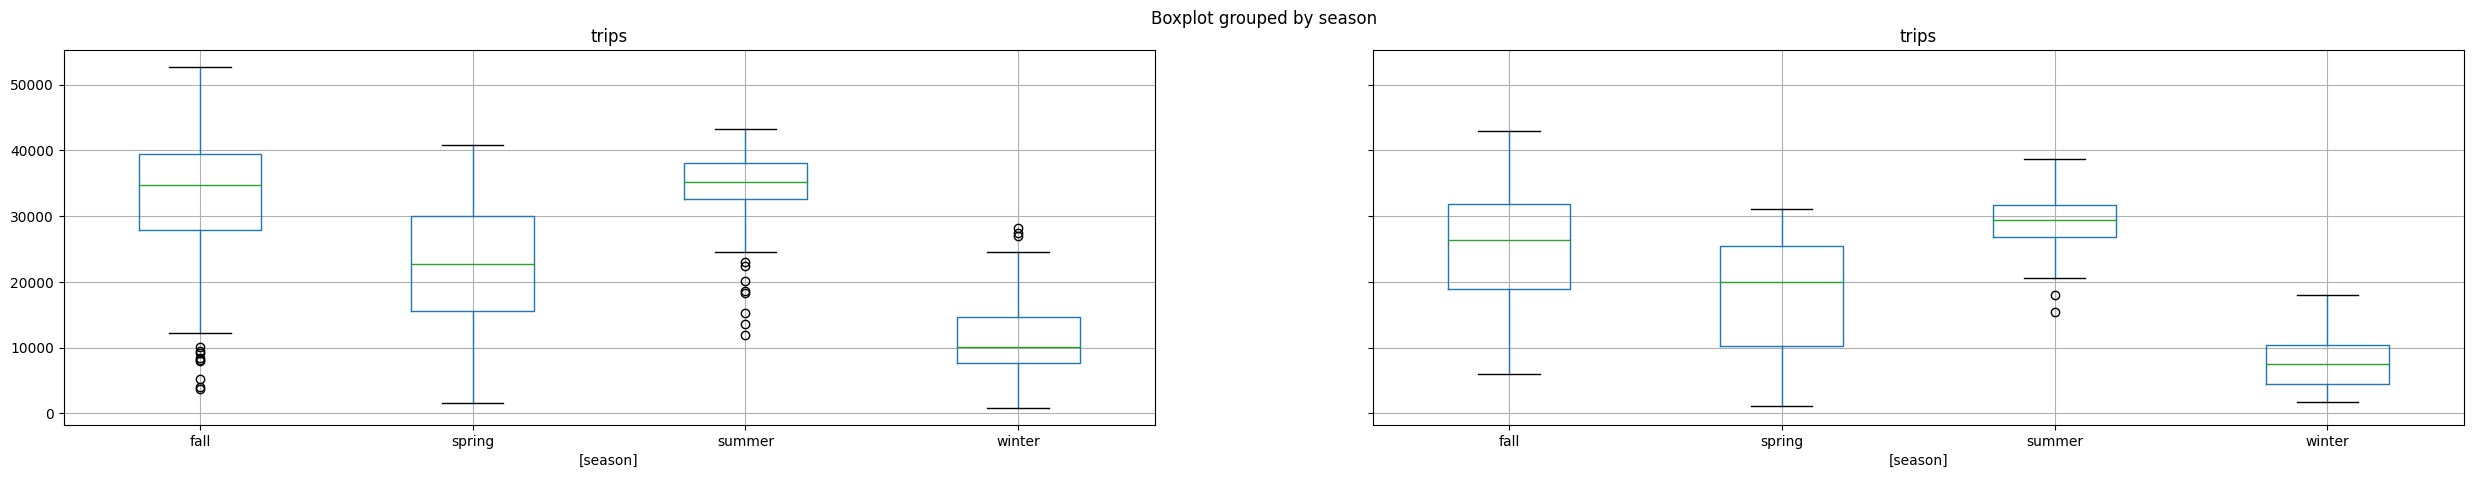

In [78]:
# boxplot that displays info for the whole dataset - trips per season
bikes.boxplot(column=['trips'], by=['season'])
# subplots - draw the boxplots for weekdays and weekends
fig = plt.figure()
fig, ax = plt.subplots(1,2, figsize = (30,5), sharey=True)
df_weekdays.boxplot(ax=ax[0], column=['trips'], by=['season'])
df_weekends.boxplot(ax=ax[1],column=['trips'], by=['season'])

- highest median trips are made in the summer 
- the median trips in the weekdays are greater than that of the weekends 

### Part 2: Qualitative predictors (10 pts)

The Season variable is an example of what’s called a categorical predictor. In this part you will fit a model with a qualitative predictor and interpret the findings.

a) Using the weekdays dataset, fit a linear regression model with trips as the response variable and season as your predictor, and print the summary of this linear regression model. [2pt]


In [19]:
import statsmodels.formula.api as smf

In [21]:
# response variable - trips ; predictor - season
lr = smf.ols('trips ~ season', data = df_weekdays).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     261.4
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          1.07e-108
Time:                        15:07:53   Log-Likelihood:                -6333.7
No. Observations:                 608   AIC:                         1.268e+04
Df Residuals:                     604   BIC:                         1.269e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.353e+04    581.221  

In [24]:
df_weekdays['season'].unique()

array(['summer', 'fall', 'winter', 'spring'], dtype=object)

b) How many total coefficients are there in the model? What does each coefficient correspond to? [1pt]

- total coefficients = 3
- correspond to: spring, summer, winter 

c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes [2pt]

- Positive coef value interprets as there were more bike trips in that paticular season than in the Fall and negative coef values interprets as there were less bike trips in that season than in the Fall.
In the above OLS output, we see that:
- there were 10,960 less bike rides in the spring compared to the fall
- there were 918 more bike rides in the summer compared to the fall
- there were 22,310 less bike rides in the winter compared to the fall


d) Repeat a) -> c) with your weekends dataset. What difference can you see? [5pt]

In [22]:
# response variable - trips ; predictor - season
lr = smf.ols('trips ~ season', data = df_weekends).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     105.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.60e-43
Time:                        15:27:31   Log-Likelihood:                -2499.5
No. Observations:                 244   AIC:                             5007.
Df Residuals:                     240   BIC:                             5021.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.577e+04    776.459  

- total coefficients = 3
- correspond to: spring, summer, winter 

- Positive coef value interprets as there were more bike trips in that paticular season than in the Fall and negative coef values interprets as there were less bike trips in that season than in the Fall.
In the above OLS output, we see that:
- there were 7,298 less bike rides in the spring compared to the fall
- there were 3,360 more bike rides in the summer compared to the fall
- there were 17,930 less bike rides in the winter compared to the fall

### Part 3: Multiple linear regression (10 pts)

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

a) Fit a regression model with trips as the response variable and the following predictors as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month [2pt]


In [30]:
# response variable: trips ; predictors: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month
mlr = smf.ols('trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + month', data = df_weekdays).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     332.2
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          3.70e-187
Time:                        16:03:40   Log-Likelihood:                -6142.1
No. Observations:                 608   AIC:                         1.230e+04
Df Residuals:                     601   BIC:                         1.233e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5252.4304   1205.888     

In [31]:
df_weekdays.head(10)

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True
5,37702,0.000000,0.0,0.0,82.04,64.04,2.68432,2013,summer,8,False,329,True,True
6,34396,0.000000,0.0,0.0,80.06,69.98,5.14495,2013,summer,8,False,329,True,True
7,28366,0.460630,0.0,0.0,80.96,69.98,4.47387,2013,summer,8,False,329,True,True
8,29017,0.051181,0.0,0.0,84.92,73.94,4.25018,2013,summer,8,False,329,True,True
11,31457,0.051181,0.0,0.0,82.04,69.98,2.01324,2013,summer,8,False,329,True,True
12,22437,0.850394,0.0,0.0,77.00,68.00,2.68432,2013,summer,8,False,329,True,True
13,38150,0.000000,0.0,0.0,73.94,60.98,6.48712,2013,summer,8,False,329,True,True


b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model [2pt]

If your height increases by 1 meter, the average weight increases by 106.5 kilograms.
- coeff of snow_depth: when snow_deapth increases by 1 unit, number of trips made decreases by 280.4113 units
- coeff of snowfall: when snowfall increases by 1 unit, number of trips made decreases by 71.3863 units
- coeff of min_temperature: when min_temperature increases by 1 unit, number of trips made decreases by 11.1556 units
- coeff of max_temperature: when max_temperaturee increases by 1 unit, number of trips made increases by 460.9413 units
- coeff of precipitation: when precipitation increases by 1 unit, number of trips made decreases by 8226.5494 units
- coeff of month: when month increases by 1 unit, number of trips made increases by 661.0439 units

c) Re-run the model from 3)a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve? [2pt]

In [34]:
# prdictor added - stations in service 
mlr = smf.ols('trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + month + stations_in_service', data = df_weekdays).fit()
print(mlr.summary())


                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     466.7
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          5.29e-238
Time:                        16:14:49   Log-Likelihood:                -6020.2
No. Observations:                 608   AIC:                         1.206e+04
Df Residuals:                     600   BIC:                         1.209e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.126e+04   1

- R squared value of the model increased from 0.768 to 0.845. 
- The more number of bike stations in service, more number of bikes are available to make trips in


d) From c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership? [2pt]

- increased ridership : min_temperature, max_temperature, month, stations_in_service
- decreased ridership : snow_depth, snowfall, precipitation 

e) Which predictors are statistically significant (95% confidence level)? [2pt]

snow_depth, max_temperature, precipitation and month are statistically significant.

### Part 4: Dealing with collinearity (8 pts)

Highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

a) Check the variables used in Problem 3)a) to see if any of the predictors are highly correlated with one another. (Lab 7 may help you here) [2pt]


In [37]:
# snow_depth, snowfall, min_temperature, max_temperature, precipitation, month

cor_matrix = df_weekdays[['trips', 'snow_depth', 'snowfall','min_temperature', 'max_temperature', 'precipitation', 'month' ]].corr().abs()
print(cor_matrix)

                    trips  snow_depth  snowfall  min_temperature  \
trips            1.000000    0.497661  0.289367         0.794193   
snow_depth       0.497661    1.000000  0.261811         0.493187   
snowfall         0.289367    0.261811  1.000000         0.237841   
min_temperature  0.794193    0.493187  0.237841         1.000000   
max_temperature  0.813664    0.475653  0.232368         0.968400   
precipitation    0.265716    0.022949  0.237246         0.013444   
month            0.448835    0.439442  0.215126         0.381236   

                 max_temperature  precipitation     month  
trips                   0.813664       0.265716  0.448835  
snow_depth              0.475653       0.022949  0.439442  
snowfall                0.232368       0.237246  0.215126  
min_temperature         0.968400       0.013444  0.381236  
max_temperature         1.000000       0.011895  0.329866  
precipitation           0.011895       1.000000  0.003059  
month                   0.329866   

max_temperature and trips seem to be highly correlated with value 0.813664.

b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated? [2pt]

max_temperature and trips seem to be highly correlated with value 0.813664. This makes sense because bikers prefer warmer weather to the cold. 

c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model. [2pt]

In [38]:
mlr = smf.ols('trips ~ snow_depth + snowfall + max_temperature + precipitation + month + stations_in_service', data = df_weekdays).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     544.7
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          3.09e-239
Time:                        16:44:41   Log-Likelihood:                -6020.6
No. Observations:                 608   AIC:                         1.206e+04
Df Residuals:                     601   BIC:                         1.209e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.155e+04   1

d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings. [2pt]

The coeff of temperature in the new model is 442.7014 as compared to 409.1487 in the old model. Yes, it is statistically significant. The value of the coeff increased as we have a single predictor variable for temperature and as max_temperature is more highly correlated to trips it is statistically significant with a higher coeff value.

### Part 5: Exploring different models (20 pts)

*Continue using weekdays as your dataset.*

a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month? [2pts]

<AxesSubplot: xlabel='trips', ylabel='month'>

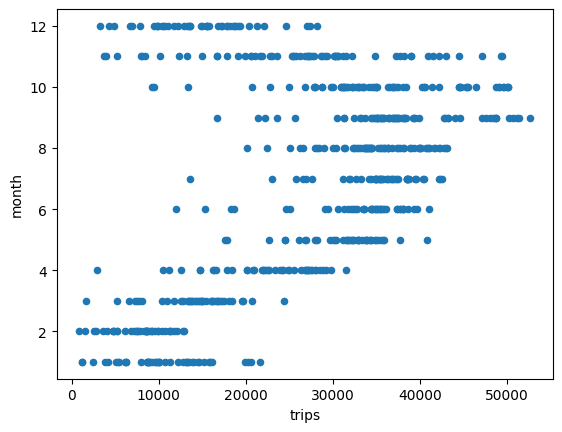

In [39]:
df_weekdays.plot.scatter(x = "trips", y = "month")

Yes, linear regression appears to be a good way of modeling how bikeshare count varies with month as it helps to determine the character and strength of the association between the independent and dependent variables.

b) Try out 3 different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than 3 models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code. [4pts]

In [42]:
# degrees of polynomial regression fits trips ~ month
degree1 = smf.ols("trips ~ month", data= df_weekdays).fit()
degree2 = smf.ols("trips ~ month + np.power(month, 2)", data= df_weekdays).fit()
degree3 = smf.ols("trips ~ month + np.power(month, 2) + np.power(month, 3)", data= df_weekdays).fit()

print("degree1 = ", degree1.rsquared_adj)
print("degree2 = ", degree2.rsquared_adj)
print("degree3 = ", degree3.rsquared_adj)

degree1 =  0.20013513947687978
degree2 =  0.5946086788659193
degree3 =  0.6690926303981859


<AxesSubplot: xlabel='month', ylabel='trips'>

<Figure size 640x480 with 0 Axes>

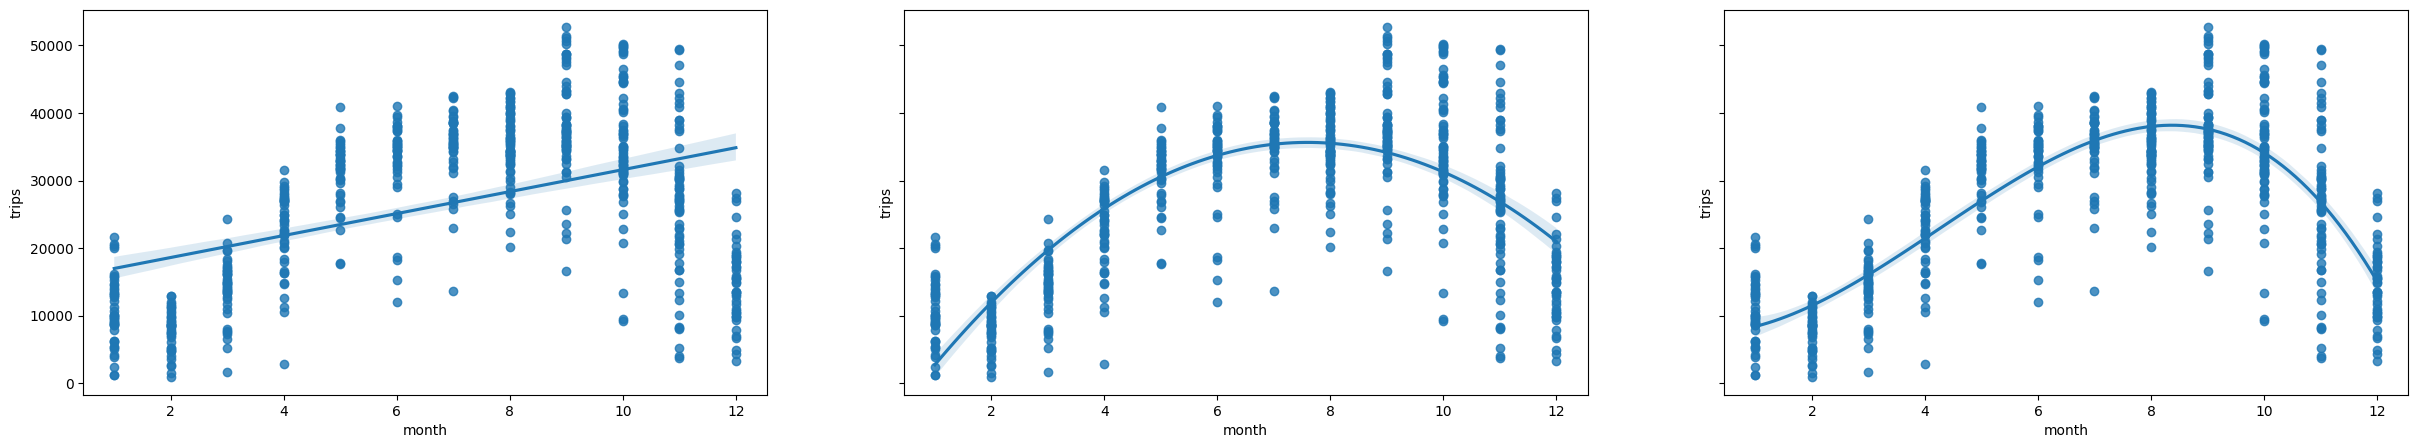

In [70]:
fig = plt.figure()
fig, ax = plt.subplots(1,3, figsize = (30,5), sharey=True)
sns.regplot(ax=ax[0],x="month", y="trips", data= df_weekdays, order=1)
sns.regplot(ax=ax[1],x="month", y="trips", data= df_weekdays, order=2)
sns.regplot(ax=ax[2],x="month", y="trips", data= df_weekdays, order=3)

degree three is seen to be the best fitting model with an adjusted r squared value of 0.6690926303981859 and captures trends the best out of all the other degrees.

c) Repeat b) to determine appropriate degree polynomials for modeling the relationship between trip and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features) [7pts]


In [43]:
# temp
degree1 = smf.ols("trips ~ max_temperature", data= df_weekdays).fit()
degree2 = smf.ols("trips ~ max_temperature + np.power(max_temperature, 2)", data= df_weekdays).fit()
degree3 = smf.ols("trips ~ max_temperature + np.power(max_temperature, 2) + np.power(max_temperature, 3)", data= df_weekdays).fit()

print("degree1 = ", degree1.rsquared_adj)
print("degree2 = ", degree2.rsquared_adj)
print("degree3 = ", degree3.rsquared_adj)

degree1 =  0.6614921737781982
degree2 =  0.6683217978418186
degree3 =  0.6825013600987261


<AxesSubplot: xlabel='max_temperature', ylabel='trips'>

<Figure size 640x480 with 0 Axes>

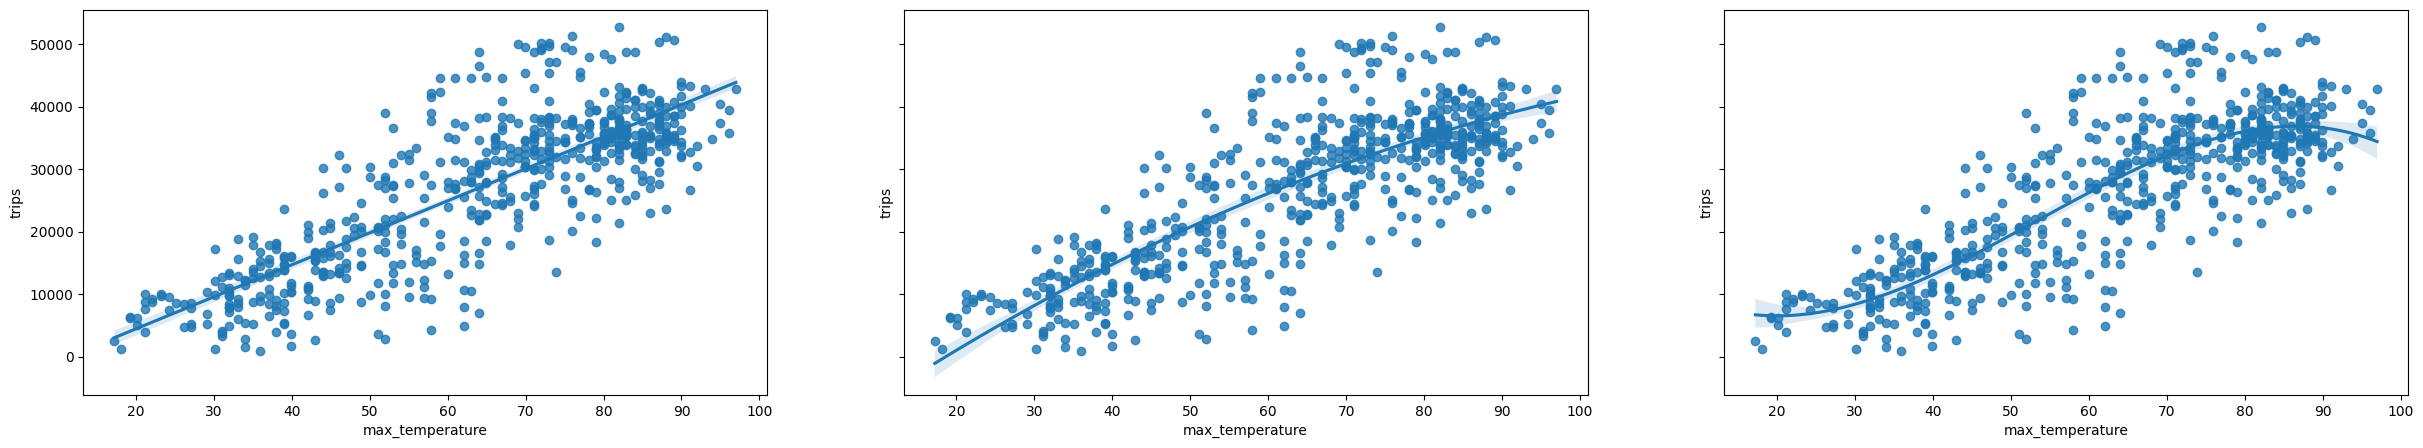

In [68]:
fig = plt.figure()
fig, ax = plt.subplots(1,3, figsize = (30,5), sharey=True)
sns.regplot(ax=ax[0],x="max_temperature", y="trips", data= df_weekdays, order=1)
sns.regplot(ax=ax[1],x="max_temperature", y="trips", data= df_weekdays, order=2)
sns.regplot(ax=ax[2],x="max_temperature", y="trips", data= df_weekdays, order=3)

degree three is seen to be the best fitting model with an adjusted r squared value of 0.6825013600987261 and captures trends the best out of all the other degrees.

In [84]:
# snow 
degree1 = smf.ols("trips ~ snow_depth + np.power(snow_depth, 2) + np.power(snow_depth, 3) + np.power(snow_depth, 4) ", data= df_weekdays).fit()
degree2 = smf.ols("trips ~ snow_depth + np.power(snow_depth, 2)+ np.power(snow_depth, 3) + np.power(snow_depth, 4) + np.power(snow_depth, 5)", data= df_weekdays).fit()
degree3 = smf.ols("trips ~ snow_depth + np.power(snow_depth, 2) + np.power(snow_depth, 3)+ np.power(snow_depth, 4) + np.power(snow_depth, 5) + np.power(snow_depth, 6)", data= df_weekdays).fit()

print("degree4 = ", degree1.rsquared_adj)
print("degree5 = ", degree2.rsquared_adj)
print("degree6 = ", degree3.rsquared_adj)

degree4 =  0.2907022352269899
degree5 =  0.2931693672476764
degree6 =  0.2962357438797659


<AxesSubplot: xlabel='snow_depth', ylabel='trips'>

<Figure size 640x480 with 0 Axes>

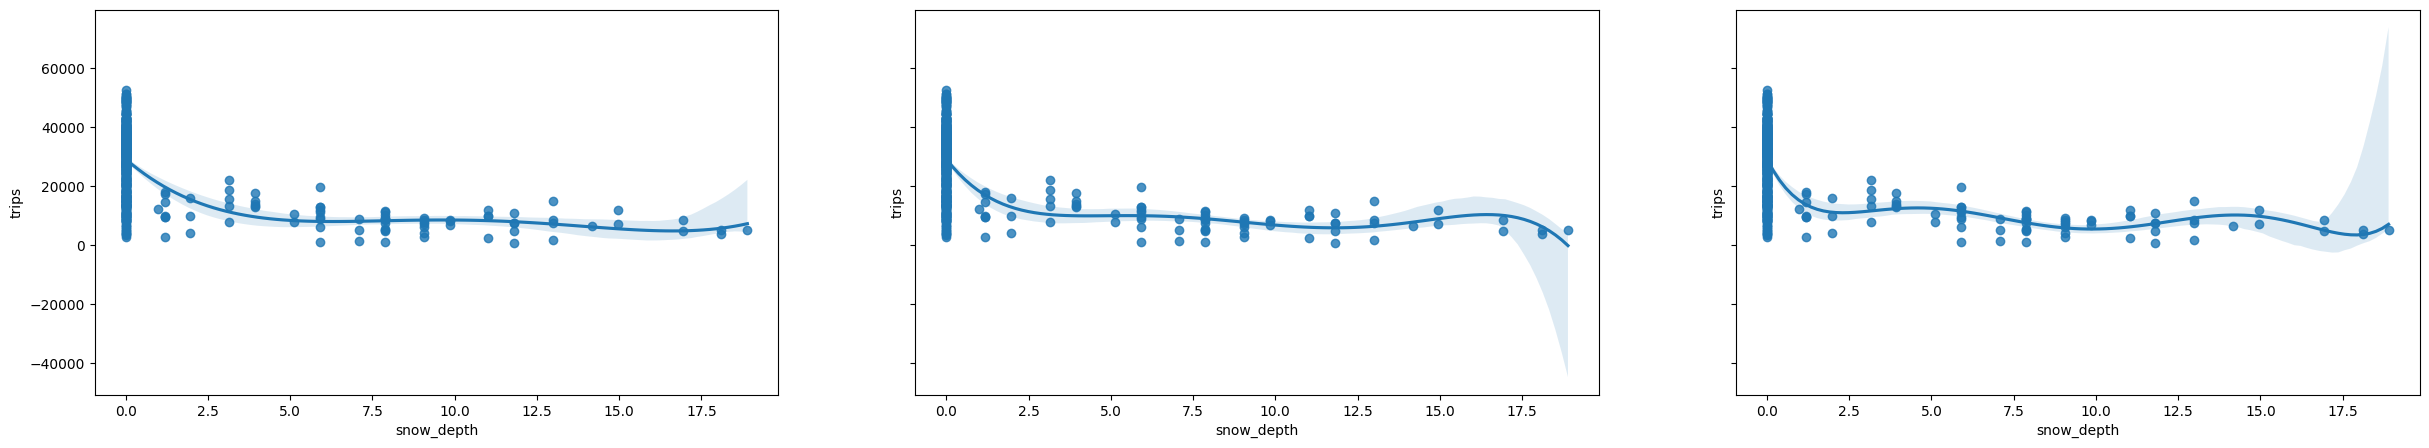

In [83]:
fig = plt.figure()
fig, ax = plt.subplots(1,3, figsize = (30,5), sharey=True)
sns.regplot(ax=ax[0],x="snow_depth", y="trips", data= df_weekdays, order=4)
sns.regplot(ax=ax[1],x="snow_depth", y="trips", data= df_weekdays, order=5)
sns.regplot(ax=ax[2],x="snow_depth", y="trips", data= df_weekdays, order=6)

degree six is seen to be the best fitting model with an adjusted r squared value of 0.2962357438797659 and captures trends the best out of all the other degrees.

In [45]:
# precipitation
degree1 = smf.ols("trips ~ precipitation", data= df_weekdays).fit()
degree2 = smf.ols("trips ~ precipitation + np.power(precipitation, 2)", data= df_weekdays).fit()
degree3 = smf.ols("trips ~ precipitation + np.power(precipitation, 2) + np.power(precipitation, 3)", data= df_weekdays).fit()

print("degree1 = ", degree1.rsquared_adj)
print("degree2 = ", degree2.rsquared_adj)
print("degree3 = ", degree3.rsquared_adj)

degree1 =  0.06907142919128928
degree2 =  0.078739452194313
degree3 =  0.09359511887808081


<AxesSubplot: xlabel='precipitation', ylabel='trips'>

<Figure size 640x480 with 0 Axes>

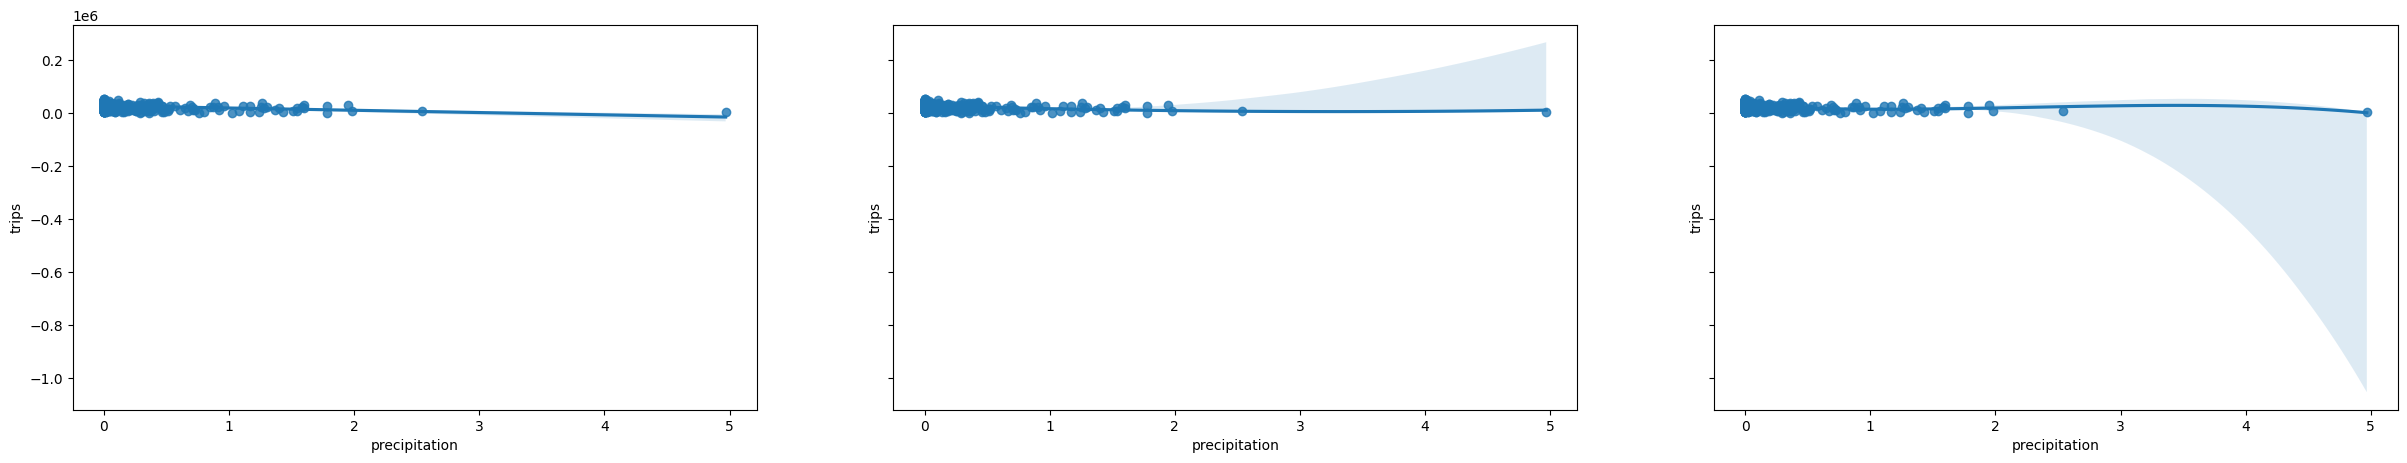

In [73]:
fig = plt.figure()
fig, ax = plt.subplots(1,3, figsize = (30,5), sharey=True)
sns.regplot(ax=ax[0],x="precipitation", y="trips", data= df_weekdays, order=1)
sns.regplot(ax=ax[1],x="precipitation", y="trips", data= df_weekdays, order=2)
sns.regplot(ax=ax[2],x="precipitation", y="trips", data= df_weekdays, order=3)

degree three is seen to be the best fitting model with an adjusted r squared value of 0.09359511887808081 and captures trends the best out of all the other degrees.

d) Repeat 5)c) with the weekends dataset. Do you notice any differences? Justify your choices and include comment on your code. [7pts]

In [46]:
# temp
degree1 = smf.ols("trips ~ max_temperature", data= df_weekends).fit()
degree2 = smf.ols("trips ~ max_temperature + np.power(max_temperature, 2)", data= df_weekends).fit()
degree3 = smf.ols("trips ~ max_temperature + np.power(max_temperature, 2) + np.power(max_temperature, 3)", data= df_weekends).fit()

print("degree1 = ", degree1.rsquared_adj)
print("degree2 = ", degree2.rsquared_adj)
print("degree3 = ", degree3.rsquared_adj)

degree1 =  0.6984171092843715
degree2 =  0.7084052047463556
degree3 =  0.7273472956582259


<AxesSubplot: xlabel='max_temperature', ylabel='trips'>

<Figure size 640x480 with 0 Axes>

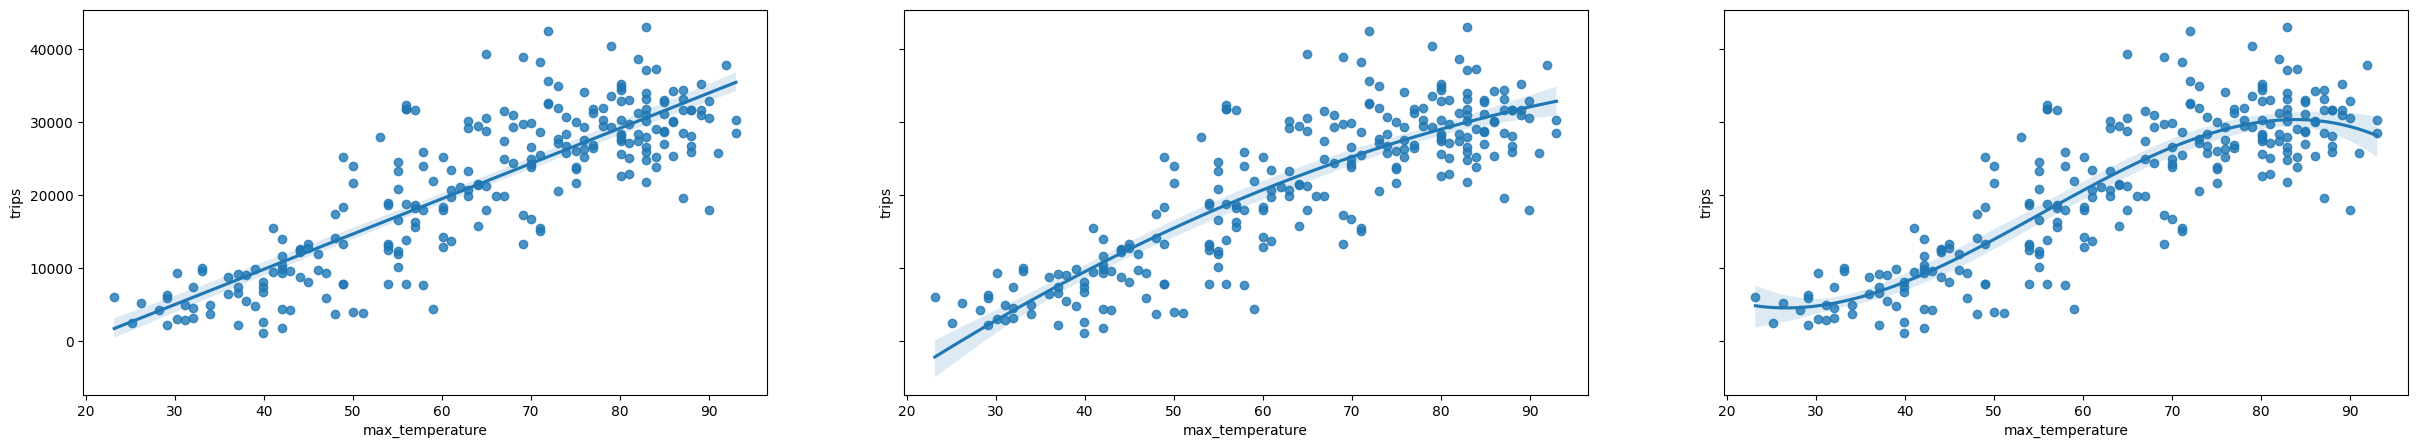

In [74]:
fig = plt.figure()
fig, ax = plt.subplots(1,3, figsize = (30,5), sharey=True)
sns.regplot(ax=ax[0],x="max_temperature", y="trips", data= df_weekends, order=1)
sns.regplot(ax=ax[1],x="max_temperature", y="trips", data= df_weekends, order=2)
sns.regplot(ax=ax[2],x="max_temperature", y="trips", data= df_weekends, order=3)

degree three is seen to be the best fitting model with an adjusted r squared value of 0.7273472956582259 and captures trends the best out of all the other degrees.

In [87]:
# snow 
degree1 = smf.ols("trips ~ snow_depth + np.power(snow_depth, 2) + np.power(snow_depth, 3) + np.power(snow_depth, 4) ", data= df_weekends).fit()
degree2 = smf.ols("trips ~ snow_depth + np.power(snow_depth, 2)+ np.power(snow_depth, 3) + np.power(snow_depth, 4) + np.power(snow_depth, 5)", data= df_weekends).fit()
degree3 = smf.ols("trips ~ snow_depth + np.power(snow_depth, 2) + np.power(snow_depth, 3)+ np.power(snow_depth, 4) + np.power(snow_depth, 5) + np.power(snow_depth, 6)", data= df_weekends).fit()

print("degree4 = ", degree1.rsquared_adj)
print("degree5 = ", degree2.rsquared_adj)
print("degree6 = ", degree3.rsquared_adj)

degree4 =  0.3131808972755372
degree5 =  0.3135090827022713
degree6 =  0.31101652594518314


<AxesSubplot: xlabel='snow_depth', ylabel='trips'>

<Figure size 640x480 with 0 Axes>

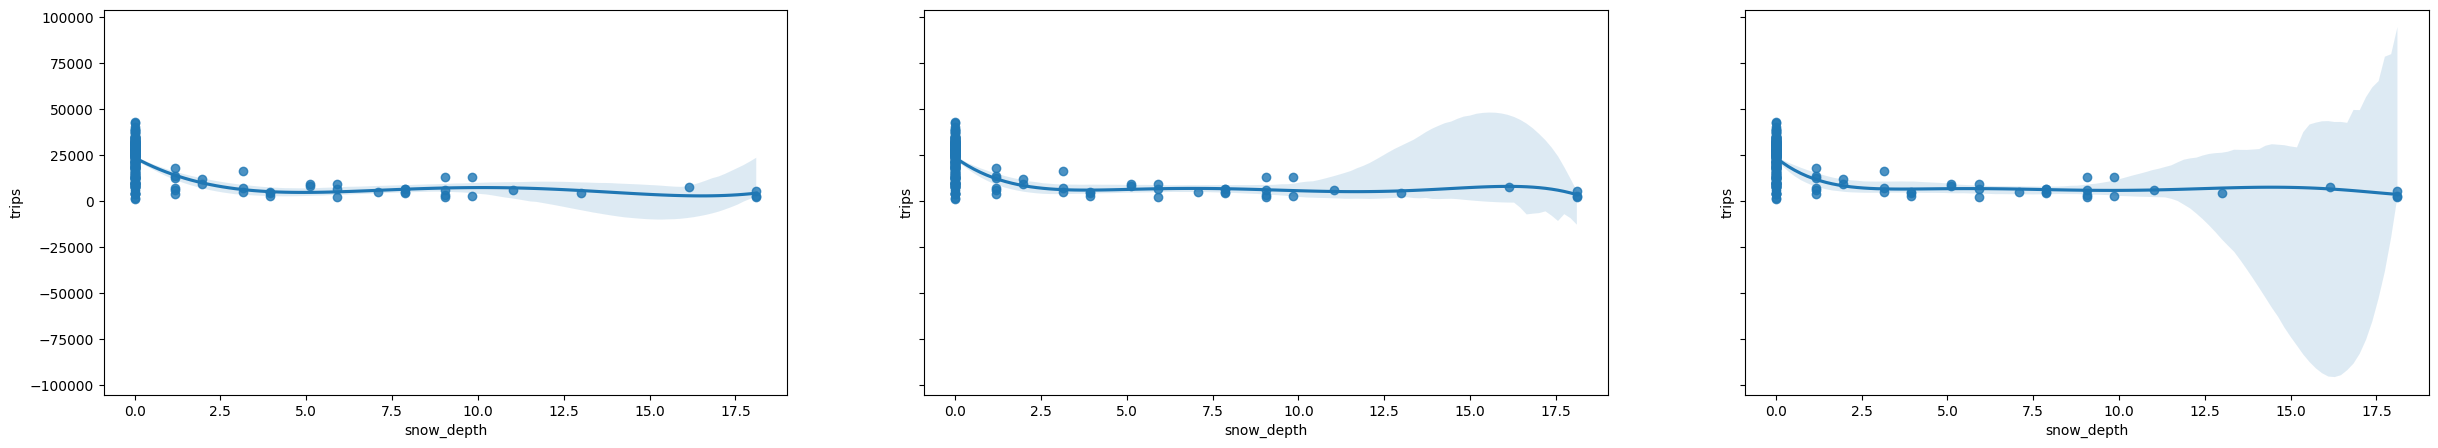

In [88]:
fig = plt.figure()
fig, ax = plt.subplots(1,3, figsize = (30,5), sharey=True)
sns.regplot(ax=ax[0],x="snow_depth", y="trips", data= df_weekends, order=4)
sns.regplot(ax=ax[1],x="snow_depth", y="trips", data= df_weekends, order=5)
sns.regplot(ax=ax[2],x="snow_depth", y="trips", data= df_weekends, order=6)

degree five is seen to be the best fitting model with an adjusted r squared value of 0.3135090827022713 and captures trends the best out of all the other degrees.

In [48]:
# precipitation
degree1 = smf.ols("trips ~ precipitation", data= df_weekends).fit()
degree2 = smf.ols("trips ~ precipitation + np.power(precipitation, 2)", data= df_weekends).fit()
degree3 = smf.ols("trips ~ precipitation + np.power(precipitation, 2) + np.power(precipitation, 3)", data= df_weekends).fit()

print("degree1 = ", degree1.rsquared_adj)
print("degree2 = ", degree2.rsquared_adj)
print("degree3 = ", degree3.rsquared_adj)

degree1 =  0.09344412926413459
degree2 =  0.09492968967119375
degree3 =  0.09498568670713703


<AxesSubplot: xlabel='precipitation', ylabel='trips'>

<Figure size 640x480 with 0 Axes>

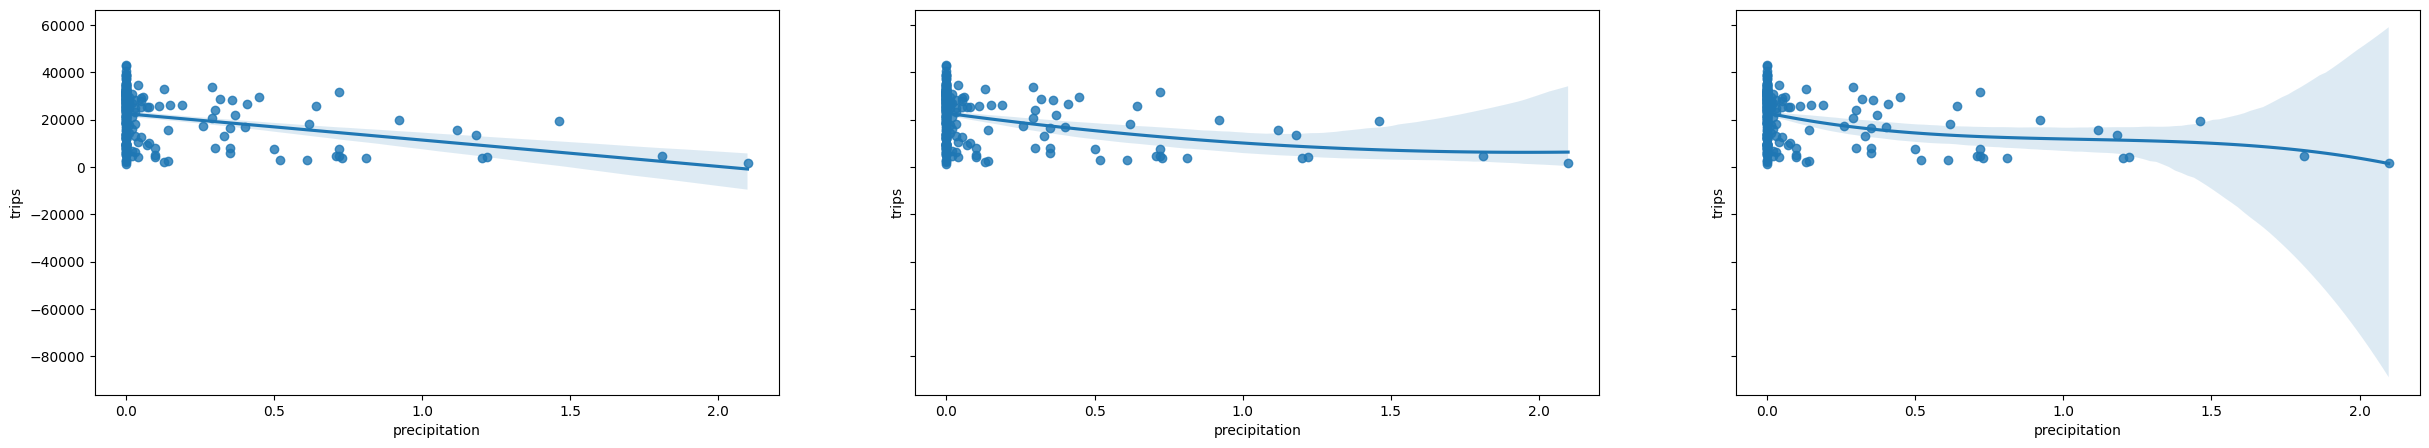

In [77]:
fig = plt.figure()
fig, ax = plt.subplots(1,3, figsize = (30,5), sharey=True)
sns.regplot(ax=ax[0],x="precipitation", y="trips", data= df_weekends, order=1)
sns.regplot(ax=ax[1],x="precipitation", y="trips", data= df_weekends, order=2)
sns.regplot(ax=ax[2],x="precipitation", y="trips", data= df_weekends, order=3)

degree three is seen to be the best fitting model with an adjusted r squared value of 0.09498568670713703 and captures trends the best out of all the other degrees.